# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


# IMPORTED ALL THE REQUIRED LIBRARIES : 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### LOADED THE FILE : 

In [71]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

### DISPLAYED ALL THE COLUMNS AND THEIR RESPECTIVE DATA TYPES : 


In [72]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


# DATA WRANGLING

### REMOVED COLUMNS WHICH ARE NOT USEFUL FOR OUR PURPOSE : 

In [73]:
df.drop(['id','Unnamed: 0'], axis = 1, inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### CHECKED FOR MISSING VALUES IN THE DATA : 

In [74]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


#### REPLACED MISSING VALUES WITH MEAN : 

In [75]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [76]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [77]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis


###  USED BOXPLOT TO DETERMINE WHETHER HOUSES WITH WATERFRONT VIEW OR WITHOUT WATERFRONT VIEW HAVE MORE PRICE OUTLIERS : 

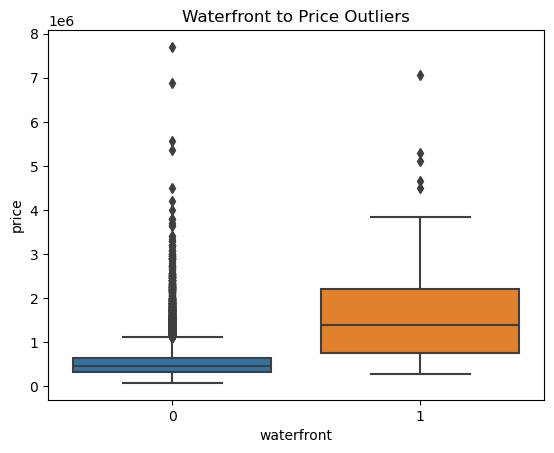

In [78]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Waterfront to Price Outliers')
plt.show()



### USED REGPLOT TO DETERMINE IF SQFT_ABOVE IS NEGATIVELY OR POSITEVELY CORRELATED RELATED TO PRICE : 

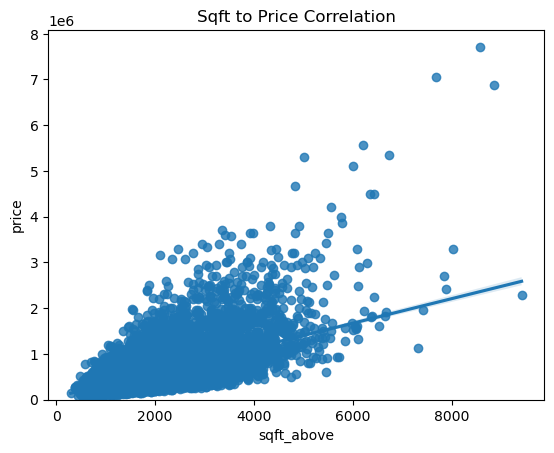

In [79]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Sqft to Price Correlation')
plt.ylim(0,)
plt.show()

# Model Development


###  CALCULATED R^2 BY FITTING A LINEAR REGRESSION MODEL WITH LONGITUDE AND PRICE AS INDIPENDENT VARIABLES : 

In [80]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### PREDICTED PRICE BY FITTING A LINEAR REGRESSION MODEL USING SQFT_ABOVE AND FUTHER CALCULATED R^2 : 


In [81]:
x=df[['sqft_living']]
y=df[['price']]
lm=LinearRegression()
lm.fit(x,y)
yhat=lm.predict(x)
print('yhat will be : ', yhat)
print('R^2 will be : ', lm.score(x,y))

yhat will be :  [[287555.06702451]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]
R^2 will be :  0.4928532179037931


### USED MULTI-LINEAR REGRESSION TO PREDICT PRICE USING 
- FLOORS 
- WATERFRONT
- LATITUDE 
- BEDROOMS 
- SQFT_BASEMENT
- VIEW
- BATHROOMS
- SQFT_LIVING15
- SQFT_ABOVE
- GRADE AND 
- SQFT_LIVING 

In [84]:
z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]  
y = df[['price']]
lm.fit(z,y)
yhat=lm.predict(z)

In [85]:
print('yhat will be : ', yhat)

yhat will be :  [[283568.05881083]
 [668133.05881083]
 [302489.05881083]
 ...
 [309696.05881083]
 [431110.05881083]
 [309184.05881083]]


### CREATED A PIPELINE INPUT TO MAKE FURTHER PREDICTIONS :
#### I USED 
 - SCALE -      STANDARDSCALER()
 - POLYNOMIAL - POLYNOMIALFEATURES()
 - MODEL -      LINEARREGRESSION()

In [86]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


###  PREDICTED PRICE USING FEATURES AND CALCULATED R^2 : 


In [87]:

pipe=Pipeline(Input)
x = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
pipe.fit(df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]],df['price'])
yhat=pipe.predict(x)

In [88]:
print('yhat is : ', yhat)

yhat is :  [350720. 560428. 450148. ... 417360. 460004. 417328.]


In [89]:
pipe.score(x,y)
print('R^2 will be : ', pipe.score(x,y))

R^2 will be :  0.7512183435262716


# MODEL REFINEMENT 

###  IMPORTED MODELS REQUIRED 


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### SEGREGATED THE DATA FOR TRAINING AND TESTING 


In [91]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### USED TO RIDGE REGRESSION OBJECT USING TRAINING DATA SET AND CALCULATED R^2 : 

In [92]:
from sklearn.linear_model import Ridge

In [93]:
x_data = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]   
y_data = df['price']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print("Test R^2:",RidgeModel.score(x_test, y_test))
print("Train R^2:",RidgeModel.score(x_train, y_train))

Test R^2: 0.6466174833937668
Train R^2: 0.6645785637506157


### PERFORMED A SECOND ORDER POLYNOMIAL ON TRAINING AND TEST DATA TO CALCULATE R^2 : 


In [94]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel_pr = Ridge(alpha=0.1)
RidgeModel_pr.fit(x_train_pr, y_train)
print("RidgeModel Test data R^2: ",RidgeModel_pr.score(x_test_pr, y_test))
print("RidgeModel Train data R^2: ",RidgeModel_pr.score(x_train_pr, y_train))

RidgeModel Test data R^2:  0.7250261335280024
RidgeModel Train data R^2:  0.7403252389853852
